In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# fig, ax = plt.subplots()

So imaging this scenario. You've analyzed the top skills for sata scientists, data engineers, and data analysts. But now, you want to compare the values across wach other, but they're all on seperate plots.

py plot odule from matplotlib offers a subplot function in order for us to graph everything on one sinegle figure

### Subplots
#### Notes
- subplots(): Create multiple plots within a single figure.
- Returns two objects:
    - fig - represents the entire figure window that will contain all the subplots.
    - ax - either a single axis object (for a single subplot) or an array of axis objects (for multiple subplots).
- Arguments:
    - nrows and ncols determine the number of rows and columns of subplots, respectively.
    - sharex and sharey control whether the x-axes or y-axes should be shared among subplots.
- Syntax: fig, ax = plt.subplots(nrows, ncols)
- E.g. fig, ax = plt.subplots(1,2) - Creates a figure with 1 row and 2 columns of subplots.

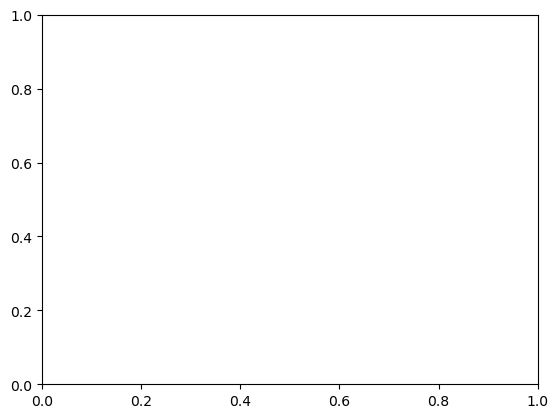

In [3]:
# create a simple subplot on a 1 by 1 figure
#there are two objects: fig and ax
#fig and ax are the standard nomenclatures for this, you can really name it ehat you want, but it's pretty common to use fig, ax
fig, ax = plt.subplots()

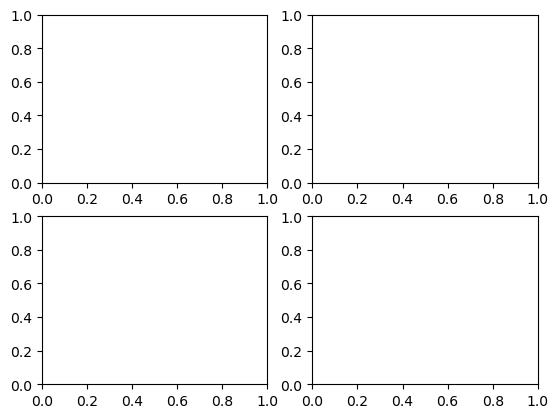

In [4]:
fig, ax = plt.subplots(2,2)

In [5]:
#the data
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

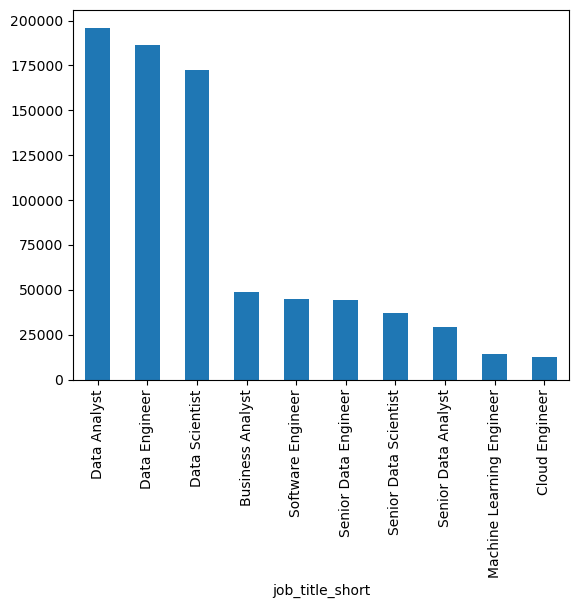

In [6]:
fig, ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind='bar')
plt.show()

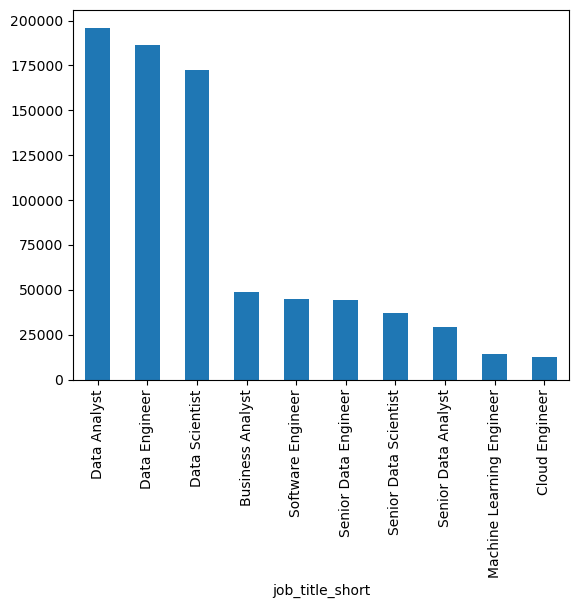

In [7]:
fig, ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind='bar', ax=ax)
plt.show()

#### Plotting 2 plots

In [8]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [9]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

We'll get both of these plots into seperate bar charts and put them on the same figure

<Axes: xlabel='job_schedule_type'>

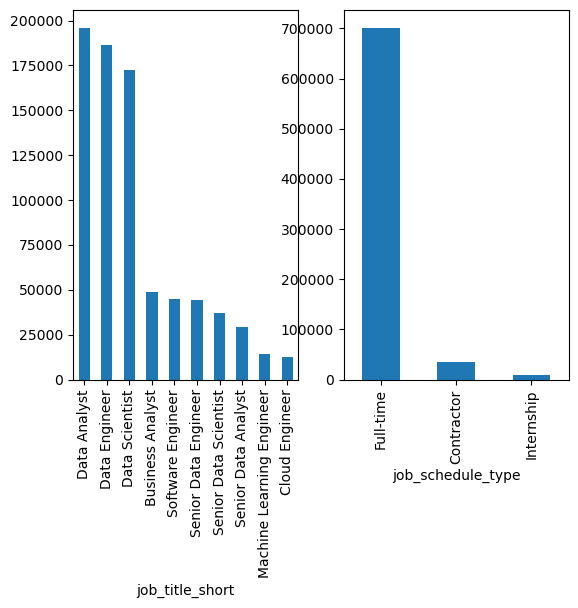

In [10]:
#Let's add two plots.

fig, ax = plt.subplots(1, 2) #(rows, columns)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])
#If we we're to run both with ax=ax, we would have run into issues
#We need to specify the index of the ax that we are using


<Axes: xlabel='job_schedule_type'>

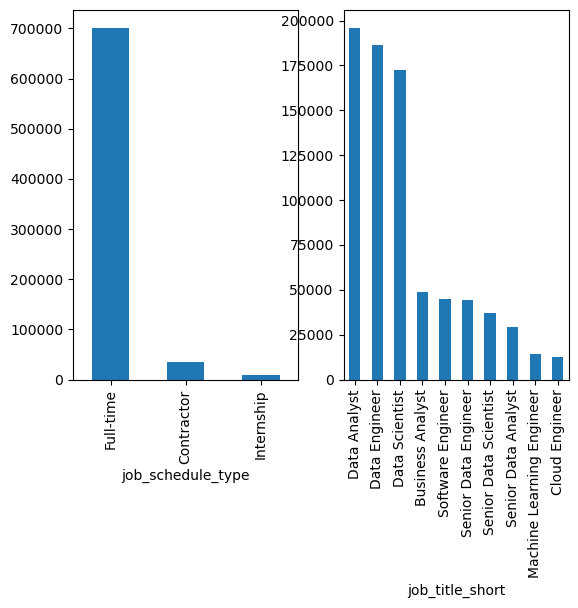

In [11]:
#If I want them to trade places, 

fig, ax = plt.subplots(1, 2) 

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])


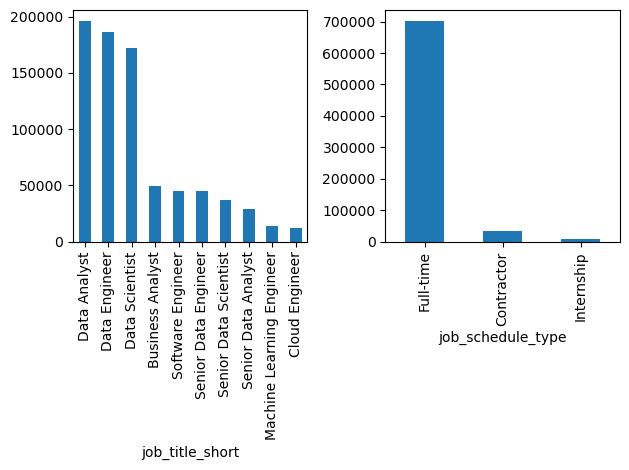

In [12]:
#We overlap in the two visulizations

fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

# We can fix the overlap with the function tight_layout()
fig.tight_layout() #we want to apply the function to the entitire figure, so fig.tight_layout()

plt.show()

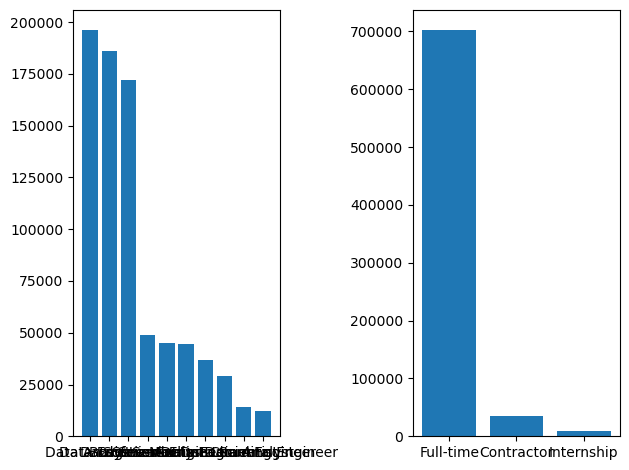

In [13]:
#We have been using the pandas methods in order to plot these visulizations
#Below is the same visulizations, but using matplolibs way of bulidling visulizations

fig, ax = plt.subplots(1, 2)

ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))

plt.tight_layout()


## Example - Counts of Top Skills in Job Postigs

In [15]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [19]:
#using a list because we're going to loop through each of these job titles, basically pulling them out of the df above, then plot them each, indivisually on to our figure
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

In [ ]:
#Another method shown in the notes to get the top 3 job titles.

job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = job_titles[:3]

job_titles

['Data Scientist', 'Data Engineer', 'Data Analyst']

0 ['Data Scientist', 'Data Engineer', 'Data Analyst']
1 ['Data Scientist', 'Data Engineer', 'Data Analyst']
2 ['Data Scientist', 'Data Engineer', 'Data Analyst']


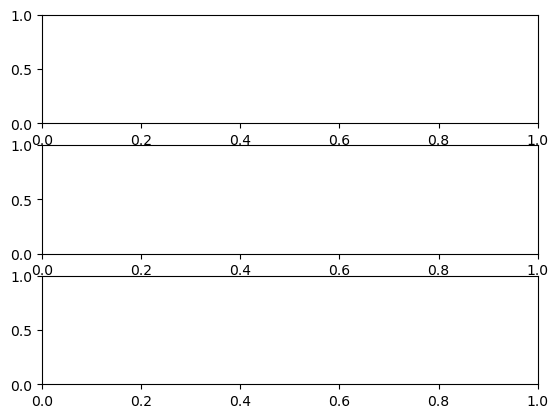

In [23]:
fig, ax = plt.subplots(3, 1) #we're stacking it. so 3 rows and 1 column

for i, job_title in enumerate(job_titles): #we'll pass in two variables: i and job_title
    print(i, job_titles)
#For refresher: whenever we enumerate through a list, it provides 1st the index, and then it prvides the actual value

0 Data Scientist
1 Data Engineer
2 Data Analyst


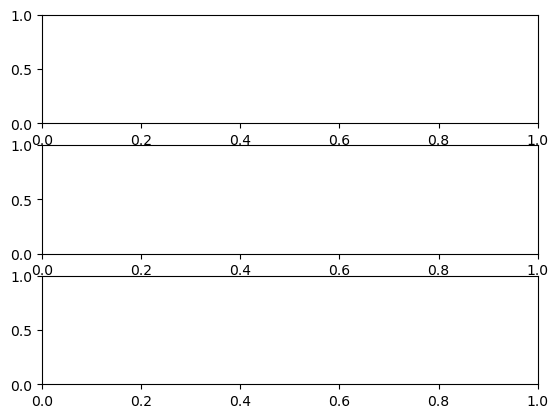

In [ ]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    print(i, job_title) #changed to job_title from job_titles

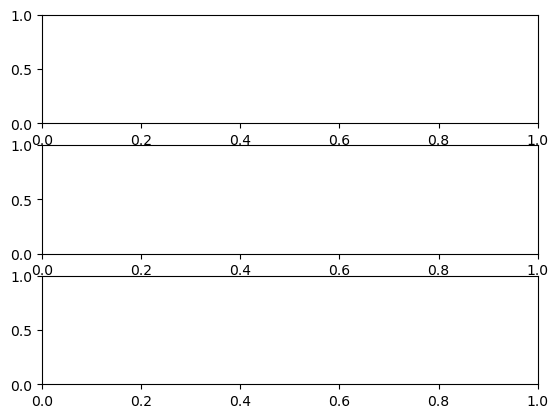

In [24]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_skills_count[df_skills_count['job_title_short'] == job_title].head(5) #want filter jsut for data scientists and just for 1st 5 values


     job_skills job_title_short  skill_count
1480     python  Data Scientist       113711
1823        sql  Data Scientist        78982
1518          r  Data Scientist        59566
1637        sas  Data Scientist        29534
1943    tableau  Data Scientist        29445
     job_skills job_title_short  skill_count
1822        sql   Data Engineer       113130
1479     python   Data Engineer       108022
141         aws   Data Engineer        62049
151       azure   Data Engineer        60674
1772      spark   Data Engineer        53656
     job_skills job_title_short  skill_count
1821        sql    Data Analyst        92428
558       excel    Data Analyst        66860
1478     python    Data Analyst        57190
1941    tableau    Data Analyst        46455
1410   power bi    Data Analyst        39380


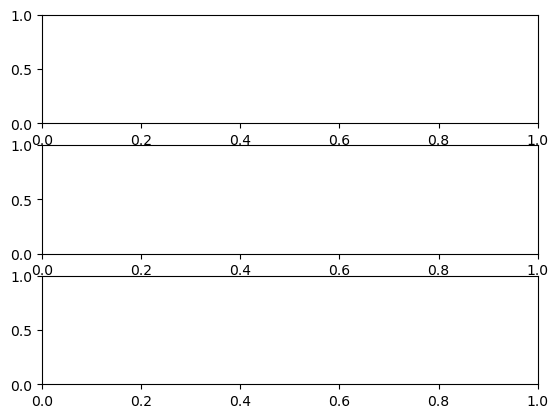

In [26]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    print(df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)) 


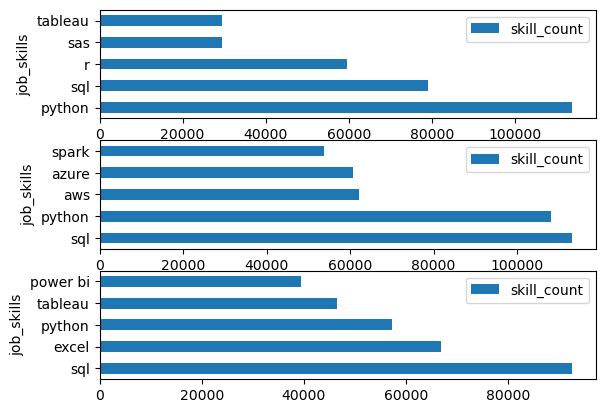

In [29]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i])

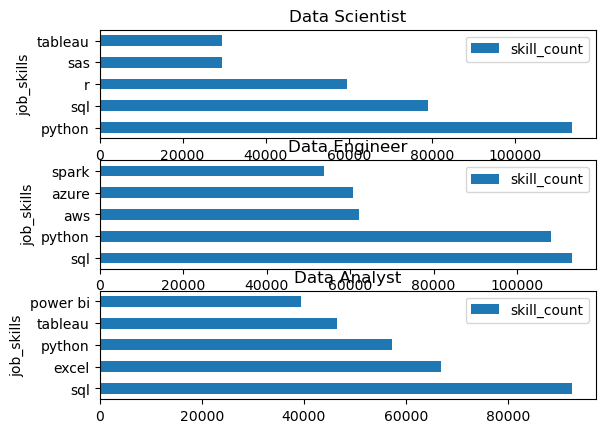

In [28]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title) #title=job_title to show the different titles


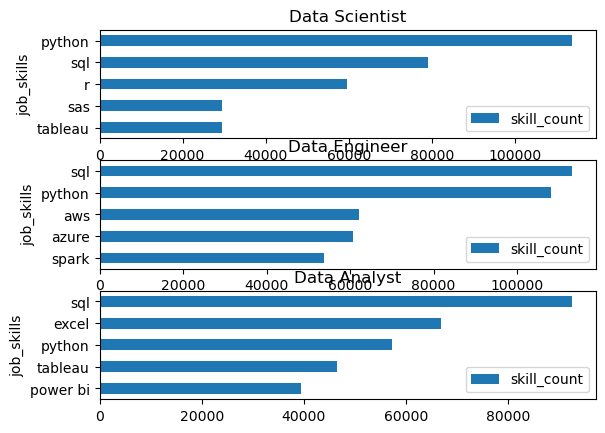

In [ ]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis() #last time, we used plt.gca().invert_yaxis() to invert the y-axis through access and access. This time, we just call out the axis specificly

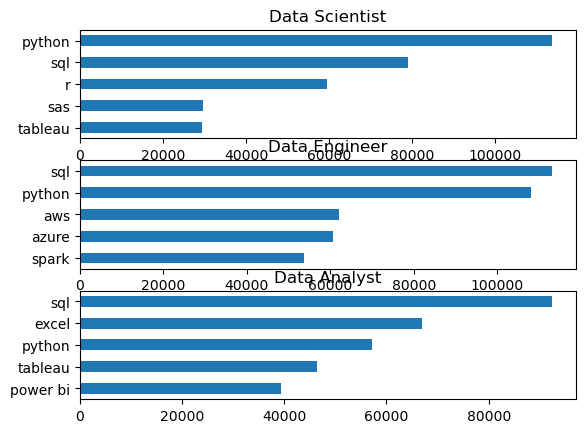

In [31]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

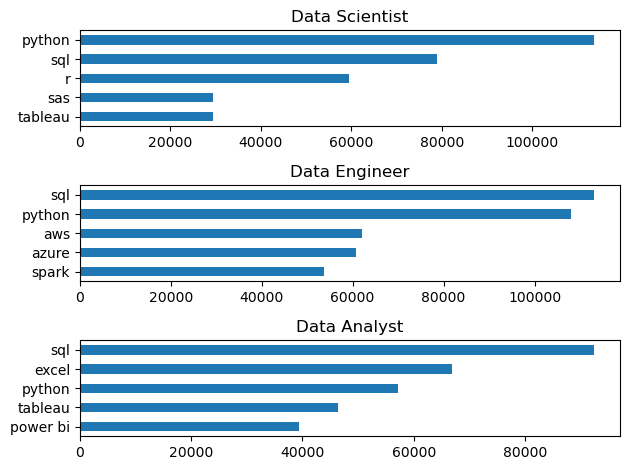

In [32]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.tight_layout()

Text(0.5, 0.98, 'Counts of Top Skills in Job Postings')

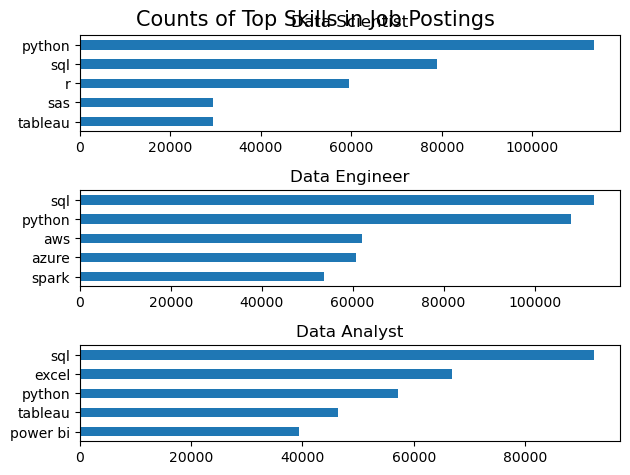

In [34]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.tight_layout()
fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)

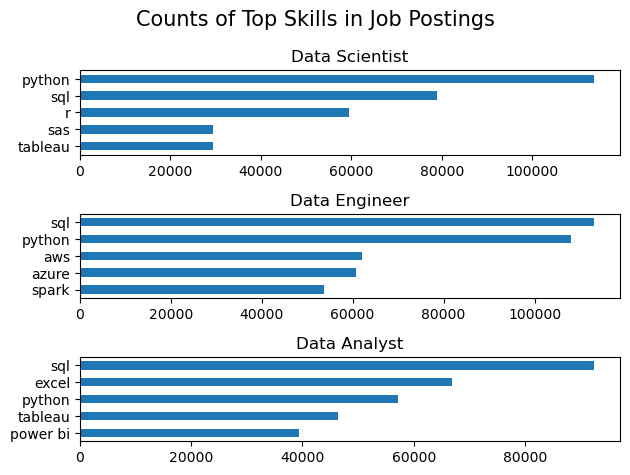

In [35]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout() #switing the order, fixes the issue above

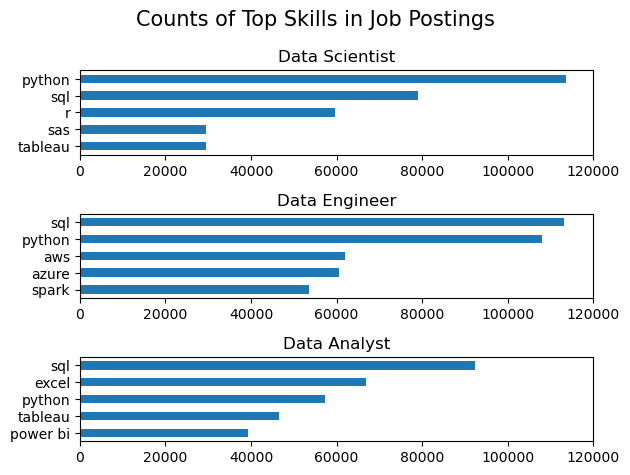

In [37]:
#Data Analyst is not on the same axis as the other two, making them not alighned, thus incomparable
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000) #to align all axes | (lowest value, highest value)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()

In [ ]:
#From Course Notes:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = job_titles[:3]

job_titles

['Data Scientist', 'Data Engineer', 'Data Analyst']

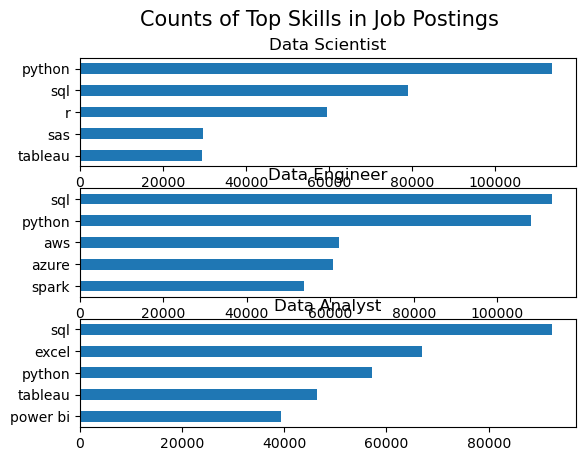

In [ ]:
#From Course Notes:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
plt.show()

___

## Course Practice Problems

Create a subplot with 2 rows and 1 column:

- In the first subplot, plot a bar chart of the top 3 job locations by the number of job postings.
- In the second subplot, plot a horizontal bar chart of the top 3 job titles by the number of job postings.
- Use tight_layout() to adjust the spacing between subplots.

(2.13.1)

    Use plt.subplots() to create the subplots and fig.tight_layout() to adjust the spacing.

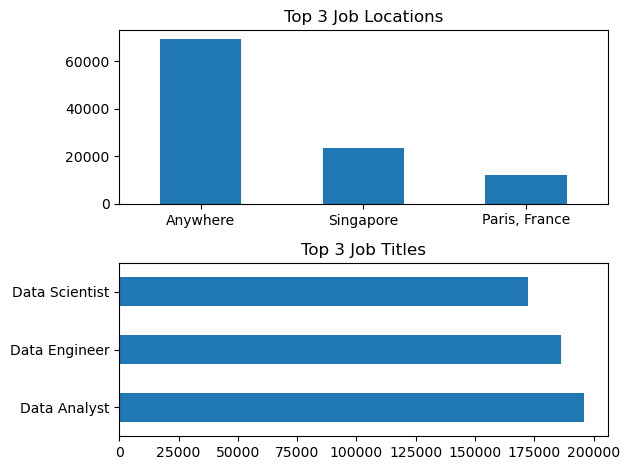

In [56]:
fig, ax = plt.subplots(2, 1)

top_job_locations = df['job_location'].value_counts().head(3).plot(kind='bar', ax=ax[0])
top_job_titles = df['job_title_short'].value_counts().head(3).plot(kind='barh', ax=ax[1])

ax[0].set_title('Top 3 Job Locations')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].tick_params(rotation=0)

ax[1].set_title('Top 3 Job Titles')
ax[1].set_xlabel('')
ax[1].set_ylabel('')


fig.tight_layout()
plt.show()

In [43]:
df['job_location'].value_counts().head(3)

job_location
Anywhere         69552
Singapore        23415
Paris, France    12311
Name: count, dtype: int64

In [42]:
df['job_title_short'].value_counts().head(3)

job_title_short
Data Analyst      196075
Data Engineer     186241
Data Scientist    172286
Name: count, dtype: int64

Create a subplot with 2 rows and 2 columns:

- In each subplot, plot a bar chart of the top 3 job titles by the number of job postings for each job schedule type (Full-time, Part-time, Contractor, and Internship).
- Use fig.tight_layout() to adjust the spacing between subplots.

Code Needed:
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

(2.13.2)

    Use plt.subplots() to create the subplots and fig.tight_layout() to adjust the spacing. Filter the DataFrame for each job schedule type before plotting.

0 Full-time
1 Part-time
2 Contractor
3 Internship


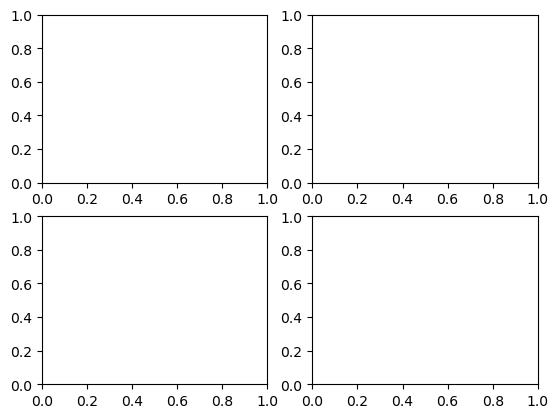

In [73]:
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

fig, ax = plt.subplots(2, 2)

for i, schedule in enumerate(schedules):
    print(i, schedule)

job_schedule_type  job_title_short
Full-time          Data Analyst       168975
                   Data Engineer      165225
                   Data Scientist     153278
Name: count, dtype: int64
job_schedule_type  job_title_short
Part-time          Data Analyst       3203
                   Data Scientist     2171
                   Data Engineer      1216
Name: count, dtype: int64
job_schedule_type  job_title_short
Contractor         Data Engineer      11492
                   Data Analyst       10009
                   Data Scientist      6150
Name: count, dtype: int64
job_schedule_type  job_title_short
Internship         Data Analyst       3290
                   Data Scientist     3225
                   Data Engineer      1244
Name: count, dtype: int64


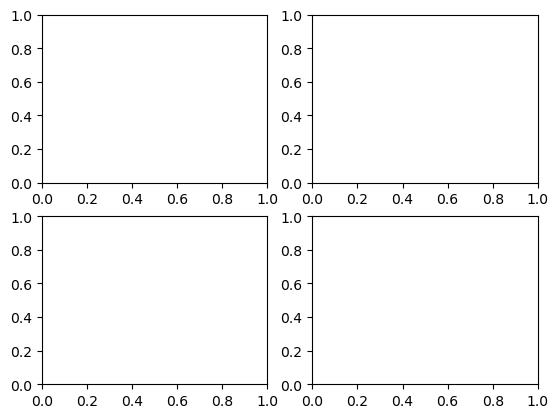

In [115]:
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

fig, ax = plt.subplots(2, 2)

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type']== schedule]
    print(df_schedule.groupby('job_schedule_type')['job_title_short'].value_counts().head(3))

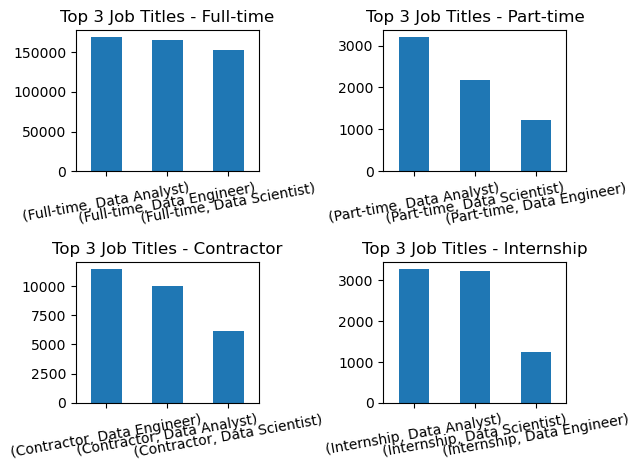

In [120]:
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

fig, ax = plt.subplots(2, 2)
ax = ax.flatten()

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type']== schedule]
    df_schedule.groupby('job_schedule_type')['job_title_short'].value_counts().head(3).plot(kind='bar', ax=ax[i])
    ax[i].set_title(f"Top 3 Job Titles - {schedule}")
    ax[i].tick_params(axis = 'x', rotation=10)
    ax[i].set_xlabel('')

fig.tight_layout()
plt.show()

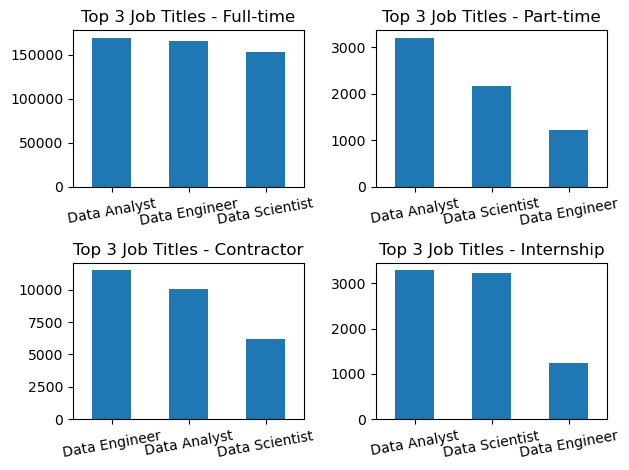

In [ ]:
#Trying with a slightly different approach
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

fig, ax = plt.subplots(2, 2)
ax = ax.flatten()

for i, schedule in enumerate(schedules):
   df_schedule = df[df['job_schedule_type']== schedule]
   top_job_titles = df_schedule['job_title_short'].value_counts().head(3).plot(kind='bar', ax=ax[i])
   ax[i].set_title(f"Top 3 Job Titles - {schedule}")
   ax[i].tick_params(axis = 'x', rotation=10)
   ax[i].set_xlabel('')

   
fig.tight_layout()
plt.show()

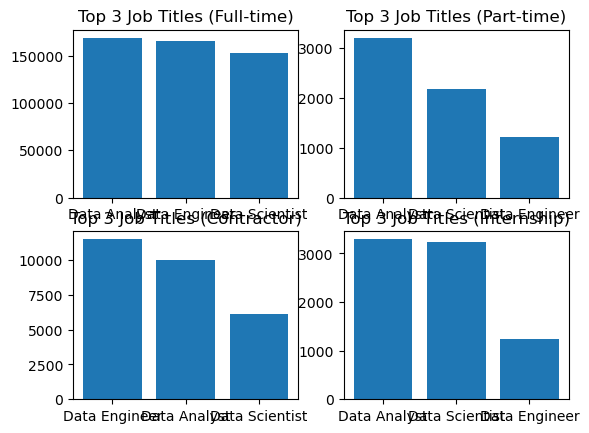

In [ ]:
#Course Solution
#Note: Labels appear better and more spacious in course pic. The y scale is also more robust with 7 instead of 4 ticks

fig, ax = plt.subplots(2, 2)

schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')

Create a subplot with 3 rows and 1 column:

- In each subplot, plot a horizontal bar chart of the top 3 job skills by the number of job postings for each job title (Senior Data Scientist, Senior Data Engineer, and Senior Data Analyst).
- Use fig.tight_layout() to adjust the spacing between subplots and invert_yaxis() to invert the y-axis in each subplot.
Code Needed:

job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']

(2.13.3)

    Use the plt.subplots() function to create subplots and fig.tight_layout() to prevent overlap.

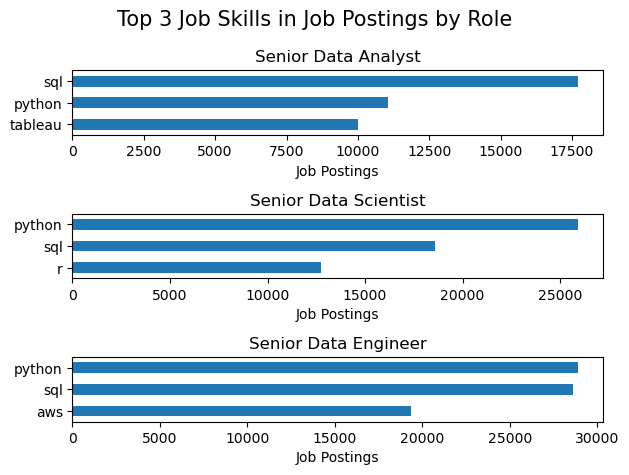

In [ ]:
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']

fig, ax = plt.subplots(3, 1)
ax = ax.flatten()

for i, role in enumerate(job_roles):
   df_roles = df[df['job_title_short']== role]
   df_exploded = df_roles.explode('job_skills')
   skill_counts = df_exploded['job_skills'].value_counts().head(3)
   skill_counts.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=role)
   ax[i].invert_yaxis()
   ax[i].set_xlabel('Job Postings')
   ax[i].set_ylabel('')
   


fig.suptitle('Top 3 Job Skills in Job Postings by Role', fontsize=15)  
fig.tight_layout()
plt.show()


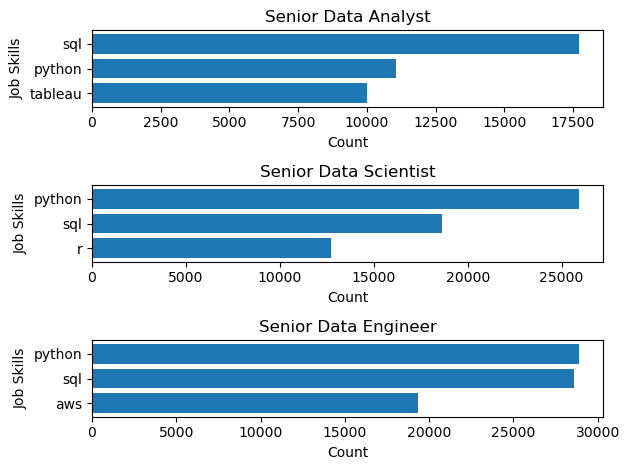

In [139]:
#Course Solution
df_skills = df.explode('job_skills')
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']
fig, ax = plt.subplots(len(job_roles), 1)
for i, role in enumerate(job_roles):
    role_skills = df_skills[df_skills['job_title_short'] == role]['job_skills'].value_counts().head(3)
    ax[i].barh(role_skills.index, role_skills.values)
    ax[i].set_title(role)
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('Job Skills')
    ax[i].invert_yaxis()
fig.tight_layout()
plt.show()

loops and ax = ax.flatten() work well with multiple dimensions, but might not be necessary in  1-dimensional 